# **Overview**

In this notebook, we will cover:
1. Logistic Regression (Classification) Model for explanatory purpose.
2. Logistic Regression (Classification) Model for predictive purpose.

An **explanatory Logistic Regression model** is used to identify factors that determine a binary outcome.

For example, a Telecom company is interested in knowing what factors affect a customer's decision to churn may use Logistic Regression model.






A **predictive Logistic Regression model** is used when the business wants to predict a binary outcome.

For example, whether a perticular customer will churn (defect) to the competition.

## **Model Interpretation and Evaluation**

***Explanatory Logistic Regression Model*** are interpreted and evaluated in much the same way as we interpret a ***Multiple Linear Regressio Model***, except a few differences:


* Whether a given factor(independent variable) is significantly related with the outcome variable. This is evaluated by the the "**p-value**" of the indepedent variable.



***Predictive Model*** are evaluated based on the accuracy of our predictions.

To assess a model's predictive performnace, we use the following metrics:

* Accuracy
* Sensitivity or True Positive Rate or Recall
* Specificity or False Positive Rate
* Precision or Hit Rate
* F1-Ratio
* AUC


Note: *One thing we need to pay special attention to is "the coding of the classes". The class represented by 1 is the positive class and the class represented by 0 is the negative class. It's important to know which catgory is positive class, customers who churn or who do not?*

# **Explanatory Model**

*Business Example* - A sports management team wants to know which NBA teams are likely to qualify for the playoffs.


## Importing Packages

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf # we will use a function "logit" from "smf" to fit an logistic regression model


## Loading the data as Pandas dataframe, extract the 2017 season data and name it as as df17

In [ ]:
df  = pd.read_csv("https://raw.githubusercontent.com/zilonguiuc/BADM211/main/NBA/player_game.csv")

In [ ]:
df.columns.to_list()

['GAME_ID',
 'TEAM_ID',
 'TEAM_ABBREVIATION',
 'TEAM_CITY',
 'PLAYER_ID',
 'PLAYER_NAME',
 'START_POSITION',
 'COMMENT',
 'MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'STL',
 'BLK',
 'TO',
 'PF',
 'PTS',
 'PLUS_MINUS']

---

### Player Game Data Dictionary:

- **GAME_ID**: Unique identifier for each game.
- **TEAM_ID**: Unique identifier for each team.
- **TEAM_ABBREVIATION**: Three-letter abbreviation representing the team.
- **TEAM_CITY**: City where the team is based.
- **PLAYER_ID**: Unique identifier for each player.
- **PLAYER_NAME**: Full name of the player.
- **START_POSITION**: Player's starting position; blank indicates the player was on the bench.
- **COMMENT**: Any additional comments related to the player's performance.
- **MIN**: Duration the player was on the court, formatted as MM:SS.
- **FGM & FGA**: Field Goals Made and Attempted respectively.
- **FG_PCT**: Percentage of successful field goals.
- **FG3M, FG3A**: Three Pointers Made and Attempted respectively.
- **FG3_PCT**: Percentage of successful three-pointers.
- **FTM & FTA**: Free Throws Made and Attempted respectively.
- **FT_PCT**: Percentage of successful free throws.
- **OREB**: Offensive rebounds secured by the player.
- **DREB**: Defensive rebounds secured by the player.
- **REB**: Total rebounds secured by the player.
- **AST**: Assists made by the player.
- **STL**: Steals made by the player.
- **BLK**: Shots blocked by the player.
- **TO**: Turnovers committed by the player.
- **PF**: Personal fouls committed by the player.
- **PTS**: Total points scored by the player.
- **PLUS_MINUS**: Player's on-court point differential.

---



## Extract the 2017 data and name it as as df_2017

The NBA's Game ID, 21400001, is a 8-digit code: XYYGGGGG, where X refers to a season prefix, YY is the season year (e.g. 14 for 2014-15), and GGGGG refers to the game number (1-1230 for a full 30-team regular season).

Extract the season information from Game_ID, and then keep only the 2017 season.

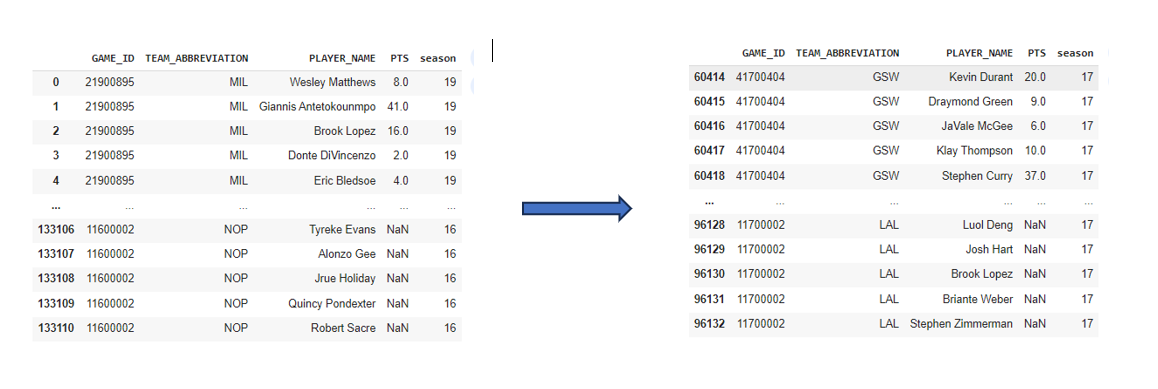

In [ ]:
# Convert GAME_ID to a string and extract the 2nd and 3rd digits
df['season'] = df['GAME_ID'].astype(str).str[1:3]



In [ ]:
# Filter for the 2017 season (assuming '17' represents the 2017 season)
df = df[df['season'] == '17']


Just keep those varaibles for futher analysis
 ['GAME_ID',  'TEAM_ABBREVIATION' ,   'PLAYER_NAME',   'PTS', 'REB', 'AST', 'TO', 'PF', 'FG3M', 'BLK']


In [ ]:
# Relevant columns to keep
relevant_columns = ['GAME_ID',  'TEAM_ABBREVIATION' ,   'PLAYER_NAME',   'PTS', 'REB', 'AST', 'TO', 'PF', 'FG3M', 'BLK']

# Filter dataframe to keep only the relevant columns
df = df[relevant_columns]


In [ ]:
df.columns

Index(['GAME_ID', 'PTS', 'REB', 'AST', 'TO', 'PF', 'FG3M', 'BLK',
       'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_NAME'],
      dtype='object')

Check top 5 rows

In [ ]:
df.head()

,GAME_ID,PTS,REB,AST,TO,PF,FG3M,BLK,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_NAME
60414,41700404,20.0,12.0,10.0,2.0,3.0,0.0,3.0,GSW,Golden State,Kevin Durant
60415,41700404,9.0,3.0,9.0,1.0,5.0,1.0,3.0,GSW,Golden State,Draymond Green
60416,41700404,6.0,3.0,0.0,0.0,1.0,0.0,1.0,GSW,Golden State,JaVale McGee
60417,41700404,10.0,6.0,0.0,2.0,3.0,2.0,0.0,GSW,Golden State,Klay Thompson
60418,41700404,37.0,6.0,4.0,2.0,4.0,7.0,3.0,GSW,Golden State,Stephen Curry


Check summary statistics of numerical variables.

In [ ]:
df.describe()

,GAME_ID,PTS,REB,AST,TO,PF,FG3M,BLK
count,3.571900e+04,29769.000000,29769.000000,29769.000000,29769.000000,29769.000000,29769.000000,29769.000000
mean,2.214597e+07,9.847761,4.038328,2.148141,1.281938,1.858678,0.974033,0.446068
std,5.549008e+06,7.998753,3.428666,2.428089,1.394078,1.440904,1.335398,0.809645
min,1.170000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.170025e+07,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.170060e+07,8.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000
75%,2.170096e+07,14.000000,6.000000,3.000000,2.000000,3.000000,2.000000,1.000000
max,4.170040e+07,60.000000,30.000000,25.000000,11.000000,6.000000,10.000000,10.000000


## Data preparation
We have data detailing individual player performance during games. To make sense of it, we'll do two things:

1. Combine all individual performances within a single game, giving us a game-level summary.
2. Then, we'll group these game-level summaries by team to get an overall team performance for each game."

First let us combine all individual performances within a single game, giving us a game-level summary.

Hint: use groupby and also use reset_index() to remove the index

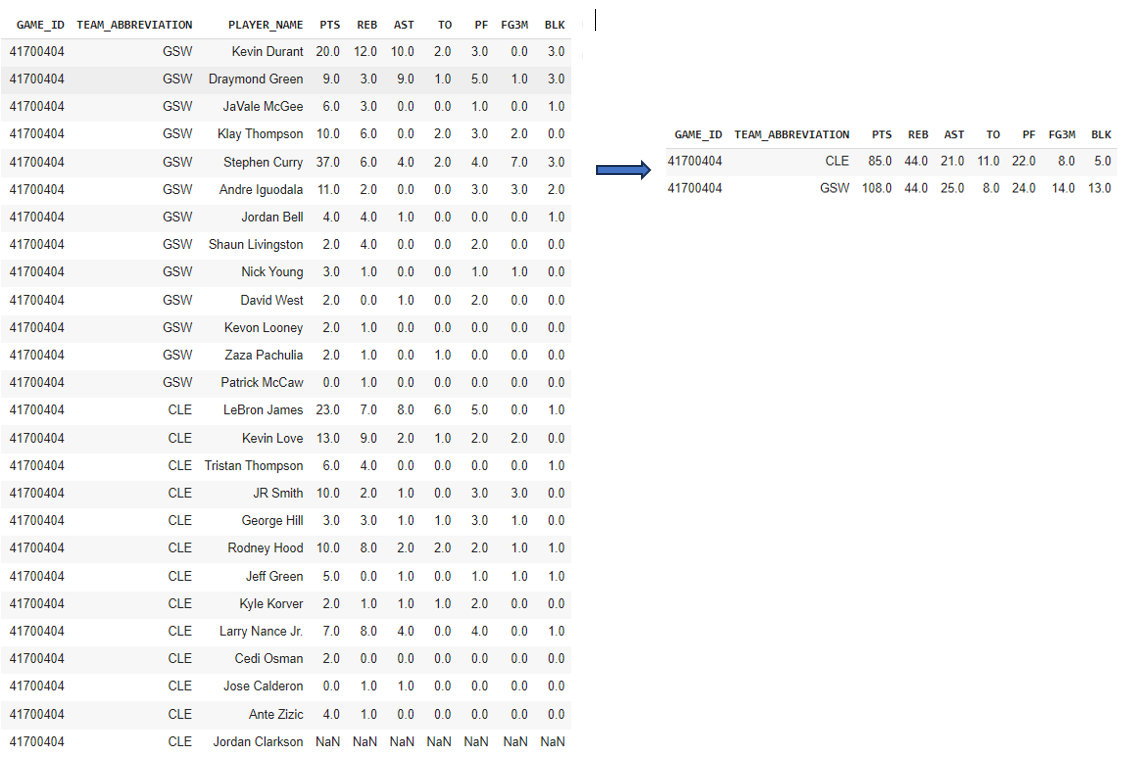

In [ ]:
df = df.groupby(['GAME_ID' , 'TEAM_ABBREVIATION']).sum().reset_index()


<ipython-input-49-73821e377f64>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['GAME_ID' , 'TEAM_ABBREVIATION']).sum().reset_index()


In [ ]:
df

,GAME_ID,TEAM_ABBREVIATION,PTS,REB,AST,TO,PF,FG3M,BLK
0,11700001,DEN,108.0,49.0,23.0,18.0,24.0,13.0,0.0
1,11700001,GSW,102.0,53.0,17.0,14.0,28.0,4.0,4.0
2,11700002,LAL,99.0,48.0,25.0,17.0,29.0,5.0,6.0
3,11700002,MIN,108.0,49.0,28.0,17.0,21.0,6.0,3.0
4,11700003,LAC,113.0,33.0,25.0,19.0,25.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...
2759,41700402,GSW,122.0,41.0,28.0,12.0,25.0,15.0,8.0
2760,41700403,CLE,102.0,47.0,20.0,13.0,18.0,9.0,4.0
2761,41700403,GSW,110.0,37.0,27.0,10.0,20.0,9.0,5.0
2762,41700404,CLE,85.0,44.0,21.0,11.0,22.0,8.0,5.0


The NBA's Game ID, 21400001, is a 8-digit code: XYYGGGGG, where X refers to a season prefix, YY is the season year (e.g. 14 for 2014-15), and GGGGG refers to the game number (1-1230 for a full 30-team regular season).

Season prefixes are...

1 : Pre Season

2 : Regular Season

3 : All-Star

4 : Post Season

Generate a indicator varaible to represent playoff game


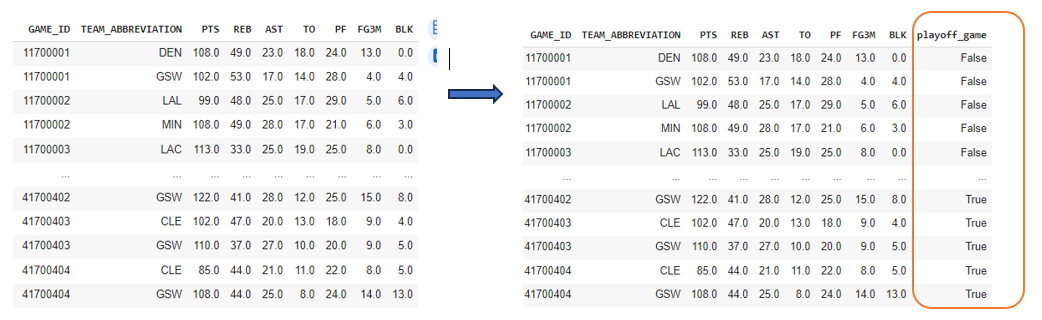

In [ ]:
df['playoff_game'] = (df['GAME_ID'] >= 40000000)

In [ ]:
df.head()

,GAME_ID,TEAM_ABBREVIATION,PTS,REB,AST,TO,PF,FG3M,BLK,playoff_game
0,11700001,DEN,108.0,49.0,23.0,18.0,24.0,13.0,0.0,False
1,11700001,GSW,102.0,53.0,17.0,14.0,28.0,4.0,4.0,False
2,11700002,LAL,99.0,48.0,25.0,17.0,29.0,5.0,6.0,False
3,11700002,MIN,108.0,49.0,28.0,17.0,21.0,6.0,3.0,False
4,11700003,LAC,113.0,33.0,25.0,19.0,25.0,8.0,0.0,False
5,11700003,TOR,119.0,44.0,22.0,21.0,34.0,11.0,3.0,False
6,11700004,ATL,90.0,42.0,18.0,16.0,25.0,6.0,1.0,False
7,11700004,MIA,96.0,48.0,24.0,22.0,22.0,9.0,9.0,False
8,11700006,MEM,92.0,54.0,16.0,17.0,21.0,4.0,8.0,False
9,11700006,ORL,84.0,49.0,26.0,15.0,24.0,5.0,11.0,False


In the prior step, we have game level data, this step we'll group these game-level summaries by team to get an overall team performance for each game.

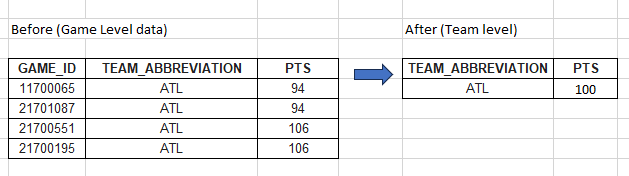

In [ ]:
df = df.groupby('TEAM_ABBREVIATION').agg({
    'PTS': 'mean',
    'REB': 'mean',
    'AST': 'mean',
    'TO': 'mean',
    'PF': 'mean',
    'FG3M': 'mean',
    'BLK': 'mean',
    'playoff_game': 'sum'
})

#or
df = df.groupby('TEAM_ABBREVIATION').mean()

In [ ]:
df

,PTS,REB,AST,TO,PF,FG3M,BLK,playoff_game
TEAM_ABBREVIATION,,,,,,,,
ATL,102.931034,41.896552,23.666667,15.195402,19.505747,11.126437,4.172414,0.0
BKN,106.906977,44.662791,23.581395,14.453488,20.837209,12.720930,4.755814,0.0
BOS,103.619048,44.076190,22.266667,12.857143,19.914286,11.314286,4.485714,19.0
CHA,107.839080,45.448276,21.482759,12.563218,17.264368,10.022989,4.517241,0.0
CHI,102.738636,44.534091,23.681818,13.602273,19.659091,11.204545,3.636364,0.0
CLE,108.366972,42.045872,22.559633,13.357798,18.917431,11.504587,3.926606,22.0
DAL,102.340909,41.590909,22.659091,12.034091,19.193182,11.954545,3.806818,0.0
DEN,109.758621,44.413793,25.103448,14.482759,18.804598,11.505747,4.862069,0.0
DET,103.747126,43.816092,22.827586,12.770115,18.402299,10.678161,3.816092,0.0


Generate an indicator for playoff teams to identify which teams participated in the playoffs. A team is considered a playoff team if it played at least one playoff game.

In [ ]:
df['playoff_team'] = (df['playoff_game'] >0 )

Check distribution of the playoff_game in the outcome variable.

In [ ]:
df['playoff_team'].value_counts()

True     16
False    14
Name: playoff_team, dtype: int64

Generate two indicators

1) one is for a 3-point shooting team, where the team's total three-pointers made (FG3M) in a game exceeds the average;

2) the other is for a defensive team, where the team's total blocks (BLK) in a game is above the average.

In [ ]:
# Calculate the average three-pointers made (FG3M) and blocks (BLK) per game
average_3pm = df['FG3M'].mean()
average_blk = df['BLK'].mean()


In [ ]:
# Generate the indicators
df["three_points_team"] = df['FG3M'] > average_3pm
df["defensive_team"] = df['BLK'] > average_blk

In [ ]:
df.head()

,PTS,REB,AST,TO,PF,FG3M,BLK,playoff_game,playoff_team,three_points_team,defensive_team
TEAM_ABBREVIATION,,,,,,,,,,,
ATL,102.931034,41.896552,23.666667,15.195402,19.505747,11.126437,4.172414,0.0,False,True,False
BKN,106.906977,44.662791,23.581395,14.453488,20.837209,12.720930,4.755814,0.0,False,True,False
BOS,103.619048,44.076190,22.266667,12.857143,19.914286,11.314286,4.485714,19.0,True,True,False
CHA,107.839080,45.448276,21.482759,12.563218,17.264368,10.022989,4.517241,0.0,False,False,False
CHI,102.738636,44.534091,23.681818,13.602273,19.659091,11.204545,3.636364,0.0,False,True,False


***For fitting a Logistic Regression model, we need to convert all the Boolean variable from "Yes vs. No" to "1 vs. 0".***

**Hint**: Use `np.where()`. This function works like `if` in Excel.

In [ ]:
 # Convert Boolean columns to 1 (True) and 0 (False) using NumPy
df['playoff_team'] = np.where(df['playoff_team'], 1, 0)


**Optional**

**The formula/ code for fitting a *Logistic Regression* model**

**exp_model = smf.logit(formula='dep_var ~ indep_var1 + indep_var2 + C(indep_var3)', data=df).fit()**

Understanding the code line above

* **smf** calls the package StatsModels
* **logit** tells Python we are using Logistic regression
* **formula=** used to write the dependent and all the independent variable(s)
* **first variable inside the parenthesis before "~"/dependent variable/outcome**: The first variable is our only dependent variable. This is our outcome, the variable that determines which type of regression to use;
* **~ inside parenthesis**: Marks the border between the outcome (dependent variable) to the left, and the independent variables to the right;
* **independent variables** : All other variables after the "~", inside parenthesis;
* **+ sign inside parenthesis**: the + sign is used to separate different independent variables inside the same model
* **C()** marks a categorical variable
* **,data=** This marks the name of the data frame.
* **.fit()** tells Python we want to fit our function ("run the function")

In [ ]:
df

,PTS,REB,AST,TO,PF,FG3M,BLK,playoff_game,playoff_team,three_points_team,defensive_team
TEAM_ABBREVIATION,,,,,,,,,,,
ATL,102.931034,41.896552,23.666667,15.195402,19.505747,11.126437,4.172414,0.0,0,True,False
BKN,106.906977,44.662791,23.581395,14.453488,20.837209,12.720930,4.755814,0.0,0,True,False
BOS,103.619048,44.076190,22.266667,12.857143,19.914286,11.314286,4.485714,19.0,1,True,False
CHA,107.839080,45.448276,21.482759,12.563218,17.264368,10.022989,4.517241,0.0,0,False,False
CHI,102.738636,44.534091,23.681818,13.602273,19.659091,11.204545,3.636364,0.0,0,True,False
CLE,108.366972,42.045872,22.559633,13.357798,18.917431,11.504587,3.926606,22.0,1,True,False
DAL,102.340909,41.590909,22.659091,12.034091,19.193182,11.954545,3.806818,0.0,0,True,False
DEN,109.758621,44.413793,25.103448,14.482759,18.804598,11.505747,4.862069,0.0,0,True,True
DET,103.747126,43.816092,22.827586,12.770115,18.402299,10.678161,3.816092,0.0,0,True,False


### Fitting a Regression Model for finding factors that determine whether a team can get into playoff.

In [ ]:
logit_reg = smf.logit("playoff_team ~ C(three_points_team) +  C(defensive_team)  + PTS+ REB+AST+TO+PF", data= df).fit()

Optimization terminated successfully.
         Current function value: 0.350636
         Iterations 9


## Model Output

In [ ]:
print(logit_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           playoff_team   No. Observations:                   30
Model:                          Logit   Df Residuals:                       22
Method:                           MLE   Df Model:                            7
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                  0.4925
Time:                        03:08:49   Log-Likelihood:                -10.519
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                  0.004736
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -62.7836     37.480     -1.675      0.094    -136.243      10.676
C(three_points_team)[T.True]     0.1892      1.104      0.171      0.864     

***Interpretation***

## Logistic Regression Results Interpretation

There is no **R-squared** in **Logistic Regression**. There is Pseudo R-squared but we don't care about that.

- **three_points_team**: In the sample, being a `three_points_team` does not seem to have a significant impact on becoming a `playoff_team` as the p-value is high (0.864). Thus, we can't confidently state its effect on making the playoffs.

- **defensive_team**: Teams that are classified as a `defensive_team` are MORE likely to be a `playoff_team` compared to teams that aren't classified as such. However, the result is marginally significant with a p-value of 0.055, which is slightly above the common alpha level of 0.05, so this result should be interpreted with caution.

- **PTS (Points)**: Increase in points has a POSITIVE impact on becoming a `playoff_team`. Teams that score more points are more likely to be in the playoffs. However, this result is also marginally significant with a p-value of 0.076.

- **REB (Rebounds)**: Rebounds don't seem to have a significant impact on making the playoffs based on the sample, as the p-value is very high (0.924).

- **AST (Assists)**: Assists, like rebounds, also don't seem to have a significant impact on making the playoffs based on the sample, given its high p-value of 0.904.

- **TO (Turnovers)**: Increase in turnovers has a NEGATIVE impact on becoming a `playoff_team`. Teams with more turnovers are less likely to make the playoffs. This effect is significant at the 0.05 level with a p-value of 0.044.

- **PF (Personal Fouls)**: More personal fouls have a POSITIVE effect on becoming a `playoff_team` in the sample. However, the significance level is borderline with a p-value of 0.075, so this interpretation should be made with caution.

---

**Note**: As with any statistical analysis, the interpretations are based on the sample data provided. In making broader generalizations, one must take into account other factors, the context, and potentially more comprehensive datasets. Additionally, p-values close to 0.05 (like 0.055 or 0.075 in this case) are typically considered marginally significant and should be interpreted cautiously.
